In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tr=pd.read_csv('D:/Shubham/DataSets For Practice/turnover.csv')

In [3]:
tr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [4]:
col_names = tr.columns.tolist()
print("Column names:",col_names)
print("\nSample data:")
tr.head()

Column names: ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'sales', 'salary']

Sample data:


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
#rename column name sales to department
tr=tr.rename(columns = {'sales':'department'})

In [6]:
tr.shape

(14999, 10)

In [7]:
 # how many departments are thier in given dataset
tr['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [8]:
tr['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [9]:
#Add the support and IT department into technical
tr['department'] =np.where(tr['department']=='support','technical',tr['department'])
tr['department'] =np.where(tr['department']=='IT','technical',tr['department'])

In [10]:
tr['department'].value_counts()

technical      6176
sales          4140
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [11]:
tr['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [12]:
tr.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


#Average satisfiction level of employee who stayed in company is greater than then who left the company.
#Avg. monttiy hours: left > stayed
#Promotion last 5years : the employee who were promoted in last five year are less is likely to leave\left

In [13]:
tr.groupby('department').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
department,,,,,,,,
RandD,0.619822,0.712122,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307
accounting,0.582151,0.717718,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253
hr,0.598809,0.708850,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298
management,0.621349,0.724000,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524
marketing,0.618601,0.715886,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117
product_mng,0.619634,0.714756,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000
sales,0.614447,0.709717,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155
technical,0.613687,0.720976,3.839054,201.813795,3.416127,0.144106,0.246924,0.008258


# Data Visiualization



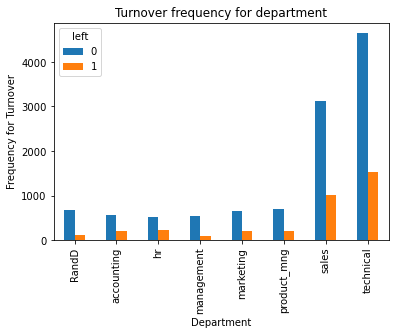

In [14]:
pd.crosstab(tr.department,tr.left).plot(kind='bar')
plt.title('Turnover frequency for department')
plt.xlabel('Department')
plt.ylabel('Frequency for Turnover')
plt.savefig('Department_bar_chart')

#The bar graph shows that frequency of employee turnover is highly depends on department they works for.

Text(0, 0.5, 'Proportion of employee')

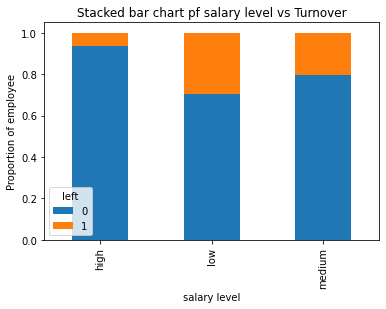

In [15]:
table=pd.crosstab(tr.salary,tr.left)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.title('Stacked bar chart pf salary level vs Turnover')
plt.xlabel('salary level')
plt.ylabel('Proportion of employee')


Proportion of the employees turnover depends a grate deal on their salary level.
Hence,salary level can be a good predictor in predicting the output

<AxesSubplot:xlabel='count', ylabel='time_spend_company'>

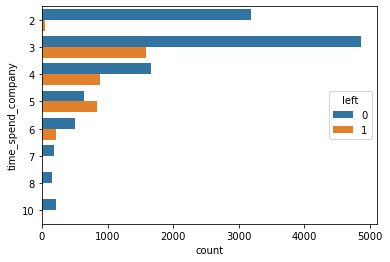

In [16]:
y=plt.subplot()
sns.countplot(data=tr, y='time_spend_company',hue='left')

<AxesSubplot:xlabel='count', ylabel='number_project'>

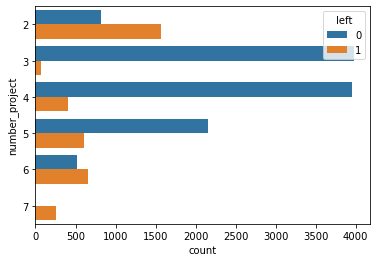

In [17]:
y=plt.subplot()
sns.countplot(data=tr, y='number_project',hue='left')

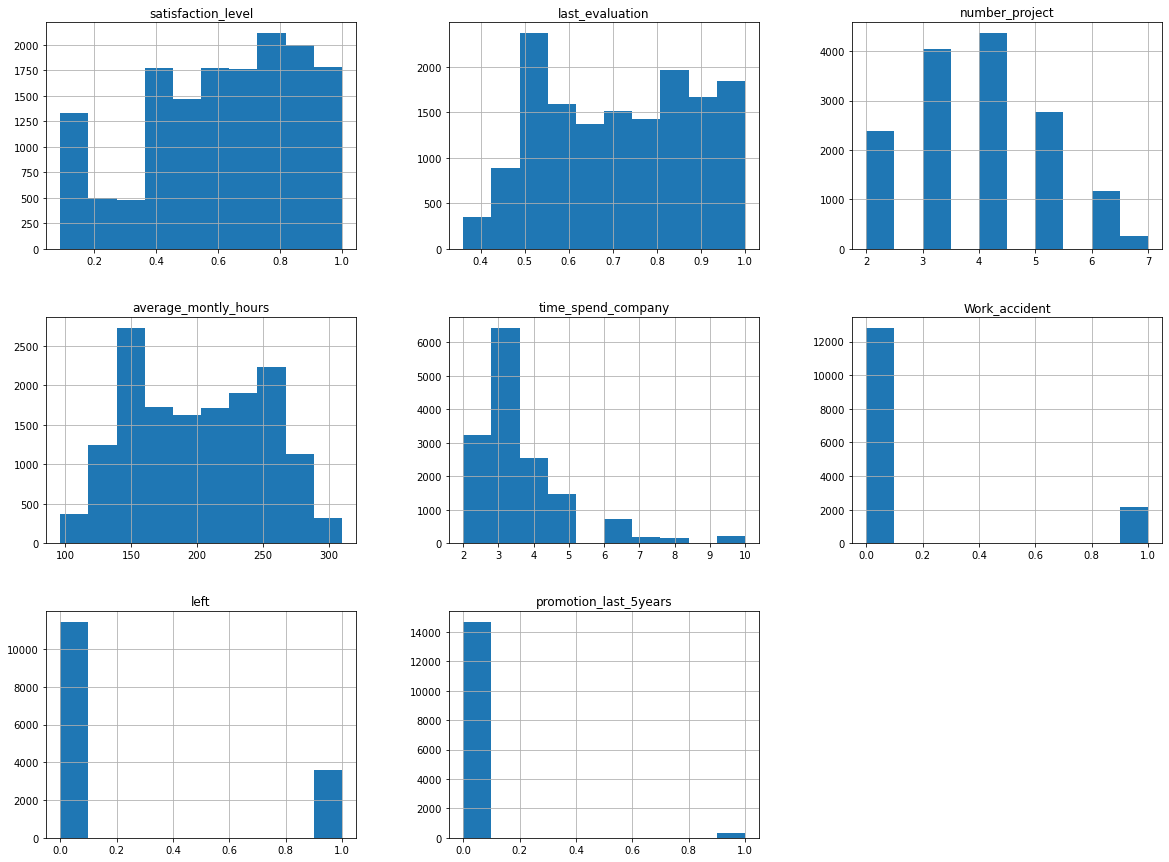

In [18]:
# Histograms are often one of the most helpful tools we can use for numeric variable

num_bins=10
tr.hist(bins=num_bins,figsize=(20,15))
plt.show()

In [19]:
tr.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


<AxesSubplot:>

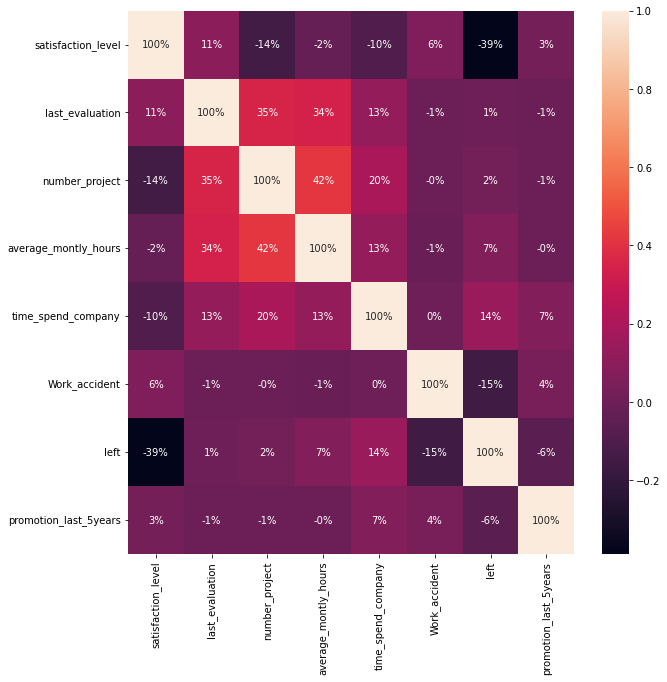

In [20]:
# Visualizing correlation metrics
plt.figure(figsize=(10,10))
sns.heatmap(tr.corr(),annot=True,fmt='.0%')

In [21]:
tr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [22]:
# As there are two categorical variables (department, salary) in the dataset and 
# they need to be converted to dummy variables before they can be used for modelling.

cat_vars=['department','salary']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(tr[var], prefix=var)
    tr1=tr.join(cat_list)
    tr=tr1

In [23]:
# now we have to remove department and salary column which have index 8,9.
tr1.drop(tr.columns[[8, 9]], axis=1, inplace=True)
tr1.columns.values

array(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'left', 'promotion_last_5years', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng',
       'department_sales', 'department_technical', 'salary_high',
       'salary_low', 'salary_medium'], dtype=object)

In [24]:
# The outcome variable is “left”, and all the other variables are predictors.
tr1_var=tr1.columns.values.tolist()
y=['left']
x=[i for i in tr1_var if i not in y]



In [25]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


In [26]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
rfe = RFE(model,n_features_to_select=10)  #RFE(estimator, *, n_features_to_select=None, step=1, verbose=0, importance_getter='auto')
rfe = rfe.fit(tr1[x], tr1[y])               # 10 will gives 10 features for prediction
print(rfe.support_)
print(rfe.ranking_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[ True  True False False  True  True  True  True False  True  True False
 False False False  True  True False]
[1 1 3 9 1 1 1 1 5 1 1 6 8 7 4 1 1 2]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
tr1

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,0,0,0,0,0,0,0,1,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,0,0,0,0,0,0,0,1,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,0,0,0,0,0,0,0,1,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,0,0,0,0,0,0,0,1,0,1,0


In [28]:
cols=['satisfaction_level', 'last_evaluation', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 
      'department_RandD', 'department_hr', 'department_management', 'salary_high', 'salary_low'] 
x=tr[cols]
y=tr['left']

# Logistic Regression Model to Predict Employee Turnover

In [29]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [30]:
#Let’s check the accuracy of our logistic regression model.

from sklearn.metrics import accuracy_score
print('Logistic regression accuracy: {:.3f}'.format(accuracy_score(y_test, logreg.predict(x_test))))

Logistic regression accuracy: 0.771


In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test,logreg.predict(x_test)))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      3462
           1       0.51      0.26      0.35      1038

    accuracy                           0.77      4500
   macro avg       0.66      0.59      0.60      4500
weighted avg       0.74      0.77      0.74      4500



Text(33.0, 0.5, 'True class')

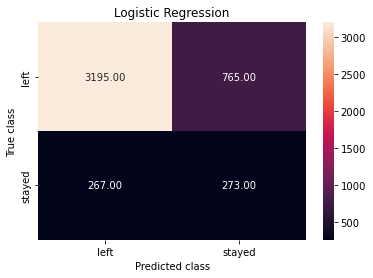

In [42]:
from sklearn.metrics import confusion_matrix
logreg_y_pred = logreg.predict(x_test)
logreg_cm = metrics.confusion_matrix(logreg_y_pred,y_test,labels=[0,1])
sns.heatmap(logreg_cm,annot=True,fmt='.2f',xticklabels=['left','stayed'],yticklabels=['left','stayed'])
plt.title('Logistic Regression')
plt.xlabel('Predicted class')
plt.ylabel('True class')



# Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [34]:
print('Random Forest Accuracy:{:.3f}'.format(accuracy_score(y_test,rf.predict(x_test))))

Random Forest Accuracy:0.978


In [37]:
print('Classification Report For Random Forest')
print(classification_report(y_test,rf.predict(x_test)))

Classification Report For Random Forest
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3462
           1       0.95      0.96      0.95      1038

    accuracy                           0.98      4500
   macro avg       0.97      0.97      0.97      4500
weighted avg       0.98      0.98      0.98      4500



Text(33.0, 0.5, 'True class')

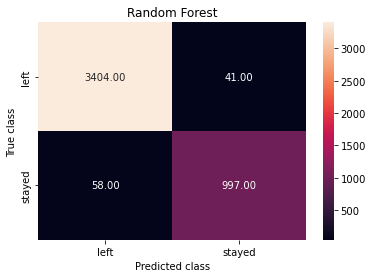

In [41]:
from sklearn.metrics import confusion_matrix
rf_y_pred = rf.predict(x_test)
rf_cm = metrics.confusion_matrix(rf_y_pred,y_test,labels=[0,1])
sns.heatmap(rf_cm,annot=True,fmt='.2f',xticklabels=['left','stayed'],yticklabels=['left','stayed'])
plt.title('Random Forest')
plt.xlabel('Predicted class')
plt.ylabel('True class')
